In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from PIL import Image
import os

In [ ]:
base_dir = ' PetImages'


In [ ]:
folder_path = 'PetImages'

for category in ['Cat', 'Dog']:
    path = os.path.join(folder_path, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        try:
            img = Image.open(img_path) 
            img.verify()                
        except (IOError, SyntaxError):
            print('Removing broken image:', img_path)
            os.remove(img_path)

Removing broken image: PetImages\Cat\666.jpg
Removing broken image: PetImages\Cat\Thumbs.db
Removing broken image: PetImages\Dog\11702.jpg


c:\Users\ASLAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\TiffImagePlugin.py:870: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Removing broken image: PetImages\Dog\Thumbs.db


In [ ]:

train_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,     
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_datagen_no_aug = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator_aug = train_datagen_aug.flow_from_directory(
    base_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator_aug = train_datagen_aug.flow_from_directory(
    base_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

train_generator_no_aug = train_datagen_no_aug.flow_from_directory(
    base_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator_no_aug = train_datagen_no_aug.flow_from_directory(
    base_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


In [ ]:

def build_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:

model_aug = build_cnn()
model_no_aug = build_cnn()

history_aug = model_aug.fit(
    train_generator_aug,
    epochs=10,
    validation_data=val_generator_aug
)

history_no_aug = model_no_aug.fit(
    train_generator_no_aug,
    epochs=10,
    validation_data=val_generator_no_aug
)


Epoch 1/10
625/625 [==============================] - 114s 181ms/step - loss: 0.6488 - accuracy: 0.6127 - val_loss: 0.5915 - val_accuracy: 0.6837
Epoch 2/10
625/625 [==============================] - 317s 508ms/step - loss: 0.5965 - accuracy: 0.6762 - val_loss: 0.5724 - val_accuracy: 0.7073
Epoch 3/10
625/625 [==============================] - 146s 234ms/step - loss: 0.5755 - accuracy: 0.6915 - val_loss: 0.5545 - val_accuracy: 0.7085
Epoch 4/10
625/625 [==============================] - 101s 162ms/step - loss: 0.5499 - accuracy: 0.7142 - val_loss: 0.5490 - val_accuracy: 0.7111
Epoch 5/10
625/625 [==============================] - 98s 157ms/step - loss: 0.5323 - accuracy: 0.7290 - val_loss: 0.5096 - val_accuracy: 0.7481
Epoch 6/10
625/625 [==============================] - 96s 153ms/step - loss: 0.5235 - accuracy: 0.7381 - val_loss: 0.5194 - val_accuracy: 0.7355
Epoch 7/10
625/625 [==============================] - 109s 175ms/step - loss: 0.5159 - accuracy: 0.7444 - val_loss: 0.5038 - v

In [ ]:

def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    plt.plot(epochs, acc, 'bo-', label='Training acc')
    plt.plot(epochs, val_acc, 'ro-', label='Validation acc')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.show()


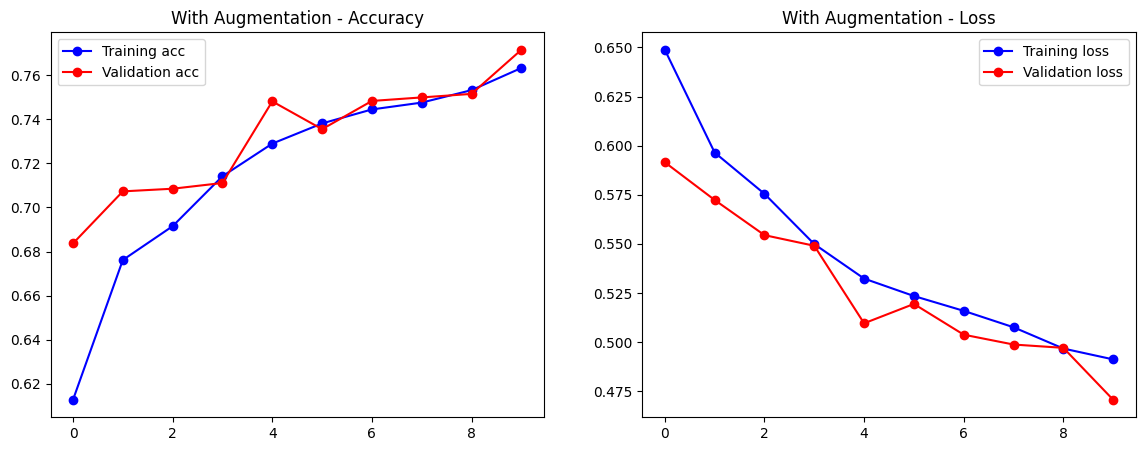

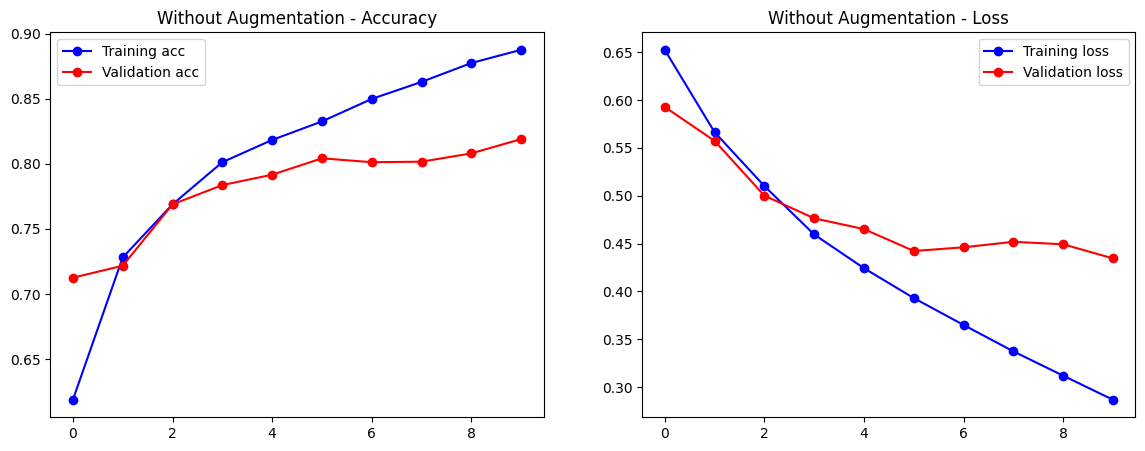

In [ ]:

plot_history(history_aug, 'With Augmentation')

plot_history(history_no_aug, 'Without Augmentation')


